In [180]:
from numpy.fft import fft, ifft, hfft
from scipy.signal import lfilter
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from IPython.display import Audio
from scipy import signal
from helpers import *

figsize=(10,5)
linewidth=2.5

In [237]:
fs = 44100
time = np.linspace(0, 2, 2*fs)

fourier = np.linspace(0, .2*np.pi, 2*fs)

In [238]:
def sine(A, w, phi, n):
    return A * np.sin(w*n - phi)

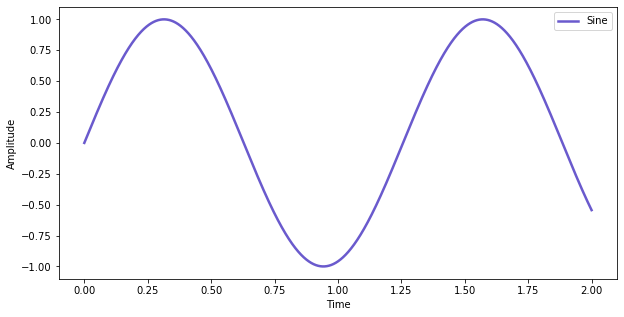

In [252]:
plt.figure(figsize=figsize)
plt.plot(time, sine(1, 5, 0, time), linewidth=linewidth,color="slateblue",  label="Sine")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')
plt.savefig("sine.pdf" ,bbox_inches='tight')
plt.show()

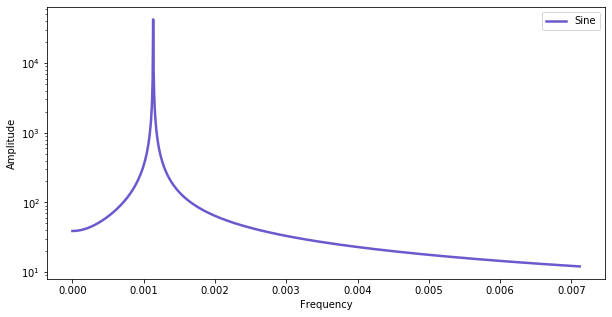

In [253]:
plt.figure(figsize=figsize)
plt.plot(fourier[:1000], np.abs(fft(sine(1, 500, 0, time)))[:1000], linewidth=linewidth,color="slateblue",  label="Sine")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.yscale("log")
plt.legend(loc='upper right')
plt.savefig("sine_fft.pdf",bbox_inches='tight')
plt.show()

In [241]:
def square(A, w, phi, n):
    return A*np.sign( np.sin( w*n - phi))

def square_sin(A, w, phi, n, order=20):
    out = 0
    for k in range(1, order):
        out += np.sin((2*k-1)*w*n - phi)/(2*k-1)
        
    return 4*A/np.pi * out

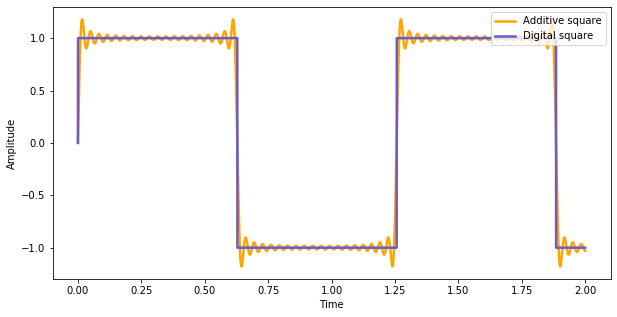

In [254]:
plt.figure(figsize=figsize)
plt.plot(time, square_sin(1, 5, 0, time), linewidth=linewidth, color="orange", label="Additive square")
plt.plot(time, square(1, 5, 0, time), linewidth=linewidth, color="slateblue", label="Digital square")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')
plt.savefig("square.pdf",bbox_inches='tight')
plt.show()

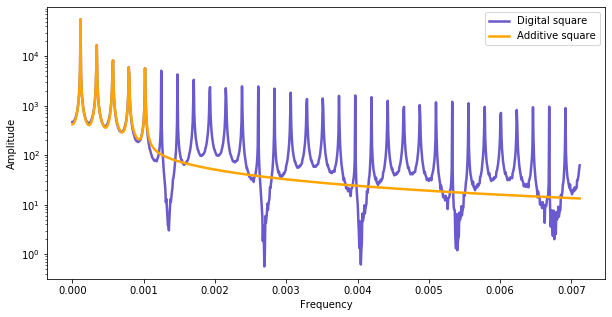

In [255]:
plt.figure(figsize=figsize)
plt.plot(fourier[:1000], np.abs(fft(square(1, 50, 0, time)))[:1000], linewidth=linewidth,color="slateblue",  label="Digital square")
plt.plot(fourier[:1000], np.abs(fft(square_sin(1, 50, 0, time, order=6)))[:1000], linewidth=linewidth, color="orange", label="Additive square")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.yscale("log")
plt.legend(loc='upper right')
plt.savefig("square_fft.pdf",bbox_inches='tight')
plt.show()

In [244]:
def triangle(A, w, phi, n):
    return 2*A/np.pi * np.arcsin( np.sin( w*n - phi))

def triangle_sin(A, w, phi, n, order=20):
    out = 0
    for k in range(order):
        out += (-1)**k/(2*k+1)**2 * np.sin( (2*k+1)* w*n - phi )
        
    return 8*A/np.pi**2 * out

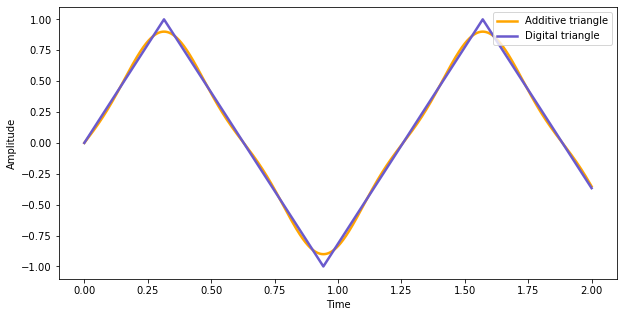

In [256]:
plt.figure(figsize=figsize)
plt.plot(time, triangle_sin(1, 5, 0, time, order=2), linewidth=linewidth, color="orange", label="Additive triangle")
plt.plot(time, triangle(1, 5, 0, time), linewidth=linewidth, color="slateblue", label="Digital triangle")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')
plt.savefig("triangle.pdf",bbox_inches='tight')
plt.show()

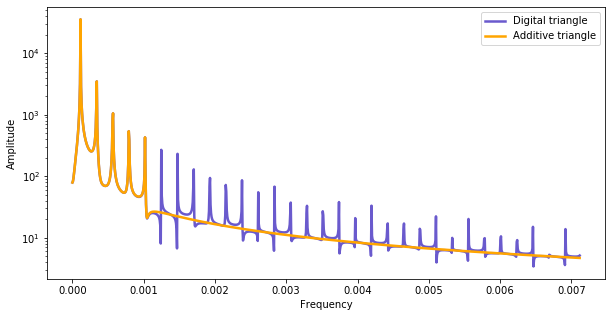

In [257]:
plt.figure(figsize=figsize)
plt.plot(fourier[:1000], np.abs(fft(triangle(1, 50, 0, time)))[:1000], linewidth=linewidth, color="slateblue", label="Digital triangle")
plt.plot(fourier[:1000], np.abs(fft(triangle_sin(1, 50, 0, time, order=5)))[:1000], linewidth=linewidth, color="orange", label="Additive triangle")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.yscale("log")
plt.legend(loc='upper right')
plt.savefig("triangle_fft.pdf",bbox_inches='tight')
plt.show()

In [247]:
def saw(A, w, phi, n):
    return 2*A/np.pi * np.arctan( np.tan( w*n - phi))

def saw_sin(A, w, phi, n, order=20):
    out = 0
    for k in range(1, order):
        out += (-1)**k/k * np.sin( 2*k*w*n - phi )
        
    return - 2* A/np.pi * out

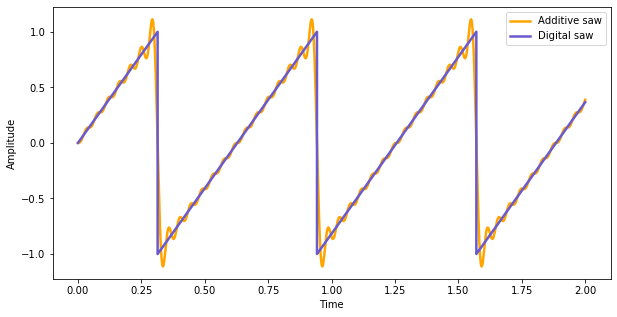

In [259]:
plt.figure(figsize=figsize)
plt.plot(time, saw_sin(1, 5, 0, time, order=15), linewidth=linewidth, color="orange", label="Additive saw")
plt.plot(time, saw(1, 5, 0, time), linewidth=linewidth, color="slateblue", label="Digital saw")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right')
plt.savefig("saw.pdf",bbox_inches='tight')
plt.show()

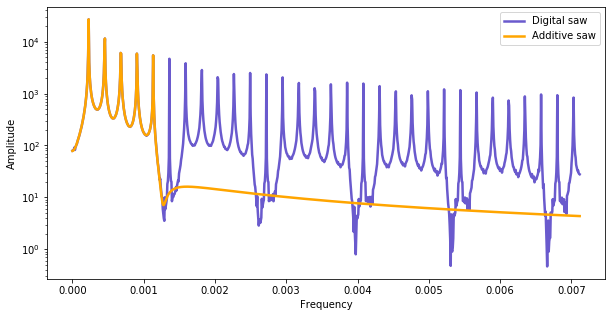

In [260]:
plt.figure(figsize=figsize)
plt.plot(fourier[:1000], np.abs(fft(saw(1, 50, 0, time)))[:1000], linewidth=linewidth, color="slateblue", label="Digital saw")
plt.plot(fourier[:1000], np.abs(fft(saw_sin(1, 50, 0, time, order=6)))[:1000], linewidth=linewidth, color="orange", label="Additive saw")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.yscale("log")
plt.legend(loc='upper right')
plt.savefig("saw_fft.pdf",bbox_inches='tight')
plt.show()